# Exploring Initial Conditions in MITgcm

In this notebook, we will explore a few ways to construct and implement initial conditions in MITgcm. 

First, import packages to create and visualize the model data here:

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

Next, define a file path to your MITgcm folder

In [2]:
model_folder = 'C:\\Users\\steph\\SJSU\\CS185C\\MITgcm'

### Initial Conditions in the Barotropic Gyre Experiment
To start, we can investigate the initial conditions in the `tutorial_barotropic_gyre` experiment we have investigated in previous courses. Read in each of the initial conditions of the model here.

In [3]:
# configuration folder
config_folder = os.path.join(model_folder,'verification','tutorial_barotropic_gyre')

# look in the SIZE file to determine the model size
# order is Nr, Ny, Nx
model_size = (1,62,62)

# read in the initial conditions
theta = np.fromfile(os.path.join(config_folder,'run','T.0000000000.data'),'>f4').reshape(model_size)
salt = np.fromfile(os.path.join(config_folder,'run','S.0000000000.data'),'>f4').reshape(model_size)
uvel = np.fromfile(os.path.join(config_folder,'run','U.0000000000.data'),'>f4').reshape(model_size)
vvel = np.fromfile(os.path.join(config_folder,'run','V.0000000000.data'),'>f4').reshape(model_size)

Now, plot the model initial conditions below.

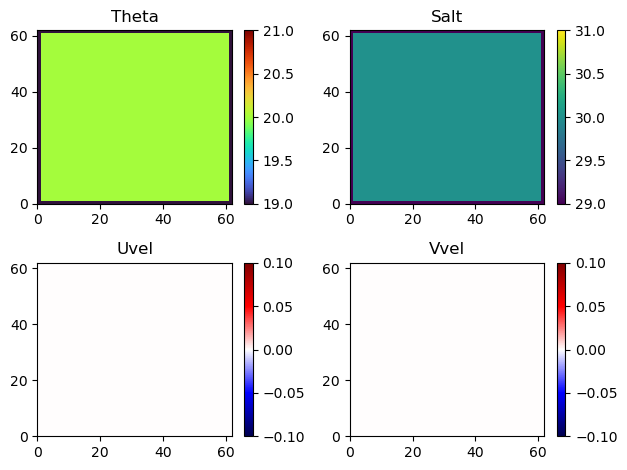

In [4]:
# plot the initial conditions (at the surface)
plt.subplot(2,2,1)
C = plt.pcolormesh(theta[0,:,:], cmap='turbo', vmin=19, vmax=21)
plt.colorbar()
plt.title('Theta')

plt.subplot(2,2,2)
C = plt.pcolormesh(salt[0,:,:], cmap='viridis', vmin=29, vmax=31)
plt.colorbar()
plt.title('Salt')

plt.subplot(2,2,3)
C = plt.pcolormesh(uvel[0,:,:], cmap='seismic', vmin=-0.1, vmax=0.1)
plt.colorbar()
plt.title('Uvel')

plt.subplot(2,2,4)
C = plt.pcolormesh(vvel[0,:,:], cmap='seismic', vmin=-0.1, vmax=0.1)
plt.colorbar()
plt.title('Vvel')

plt.tight_layout()

plt.show()

### &#x1F4A1; Observations
- Temperature and salinity are assigned default values of 20 and 30 (respectively)
- Velocity is assigned a default value of 0

### Initial Conditions in the Global Tutorial Lat/Lon Experiment
Next, we can investigate the initial conditions in the `tutorial_global_oce_latlon` experiment we have investigated in a previous homework. Read in the initial conditions of this model below:

In [9]:
# configuration folder
config_folder = os.path.join(model_folder,'verification','tutorial_global_oce_latlon')

# look in the SIZE file to determine the model size
# order is Nr, Ny, Nx
model_size = (15,40,90)

# read in the initial conditions
theta = np.fromfile(os.path.join(config_folder,'run','T.0000000000.data'),'>f4').reshape(model_size)
salt = np.fromfile(os.path.join(config_folder,'run','S.0000000000.data'),'>f4').reshape(model_size)
uvel = np.fromfile(os.path.join(config_folder,'run','U.0000000000.data'),'>f4').reshape(model_size)
vvel = np.fromfile(os.path.join(config_folder,'run','V.0000000000.data'),'>f4').reshape(model_size)

Then, plot the initial conditions as above:

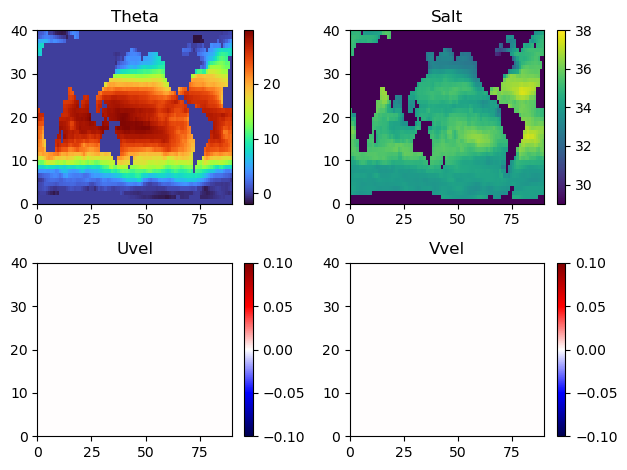

False

In [17]:
# plot the initial conditions (at the surface)
plt.subplot(2,2,1)
C = plt.pcolormesh(theta[0,:,:], cmap='turbo')
plt.colorbar()
plt.title('Theta')

plt.subplot(2,2,2)
C = plt.pcolormesh(salt[0,:,:], cmap='viridis', vmin=29, vmax=38)
plt.colorbar()
plt.title('Salt')

plt.subplot(2,2,3)
C = plt.pcolormesh(uvel[0,:,:], cmap='seismic', vmin=-0.1, vmax=0.1)
plt.colorbar()
plt.title('Uvel')

plt.subplot(2,2,4)
C = plt.pcolormesh(vvel[0,:,:], cmap='seismic', vmin=-0.1, vmax=0.1)
plt.colorbar()
plt.title('Vvel')
plt.tight_layout()

plt.show()
os.path.exists('/mnt/c/Users/steph/SJSU/CS185C/MITgcm/verification/tutorial_global_oce_latlon/run/lev_t.bin')

Where are these conditions provided? By looking in the `data` file, we can see that there are two files provided for the initial temperature and salinity: `lev_t.bin` and `lev_s.bin`. Let's read those in and plot them to double check they are the same fields.

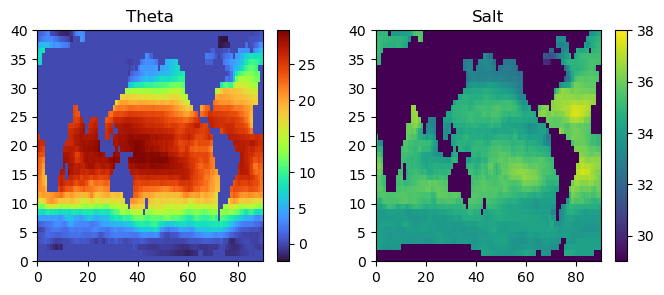

In [18]:
# read in the initial conditions
grid_size = (12, 15, 40, 90)
theta = np.fromfile(os.path.join(config_folder,'run','lev_t.bin'),'>f4').reshape(grid_size)
salt = np.fromfile(os.path.join(config_folder,'run','lev_s.bin'),'>f4').reshape(grid_size)

plt.figure(figsize=(8,3))
# plot the provided initial conditions (at the surface)
plt.subplot(1,2,1)
C = plt.pcolormesh(theta[0,0,:,:], cmap='turbo')
plt.colorbar()
plt.title('Theta')

plt.subplot(1,2,2)
C = plt.pcolormesh(salt[0,0,:,:], cmap='viridis', vmin=29, vmax=38)
plt.colorbar()
plt.title('Salt')

plt.show()

### &#x1F4A1; Observation
- We can *provide* initital conditions by specifying them in the `data` file

### Picking Up Where You Left Off
In one of the previous homework experiments, we used a *pickup* file that could be used to restart an experiment that was already run for a given period of time. This represents another way to provide initial conditions to your model. Here, let's look at the contents of a pickup file.

In [25]:
# define the number of layers in the input file
n_3D_layers = 8
n_2D_layers = 3
Nr = 15
total_layers = Nr*n_3D_layers + n_2D_layers

# read in the pickup grid
pickup_size = (total_layers, 40, 90)
pickup_grid = np.fromfile(os.path.join(config_folder,'run','pickup.0000070080.data'),'>f8').reshape(pickup_size)

# read the fields from the grid
uvel = pickup_grid[:Nr, :, :]
vvel = pickup_grid[Nr:2*Nr, :, :]
theta = pickup_grid[2*Nr:3*Nr, :, :]
salt = pickup_grid[3*Nr:4*Nr, :, :]
GuNm1 = pickup_grid[4*Nr:5*Nr, :, :]
GvNm1 = pickup_grid[5*Nr:6*Nr, :, :]
GtNm1 = pickup_grid[6*Nr:7*Nr, :, :]
GsNm1 = pickup_grid[7*Nr:8*Nr, :, :]
EtaN = pickup_grid[8*Nr, :, :]
dEtaHdt = pickup_grid[8*Nr+1, :, :]
EtaH = pickup_grid[8*Nr+2, :, :]

Now, we can plot all 11 fields of the pickup

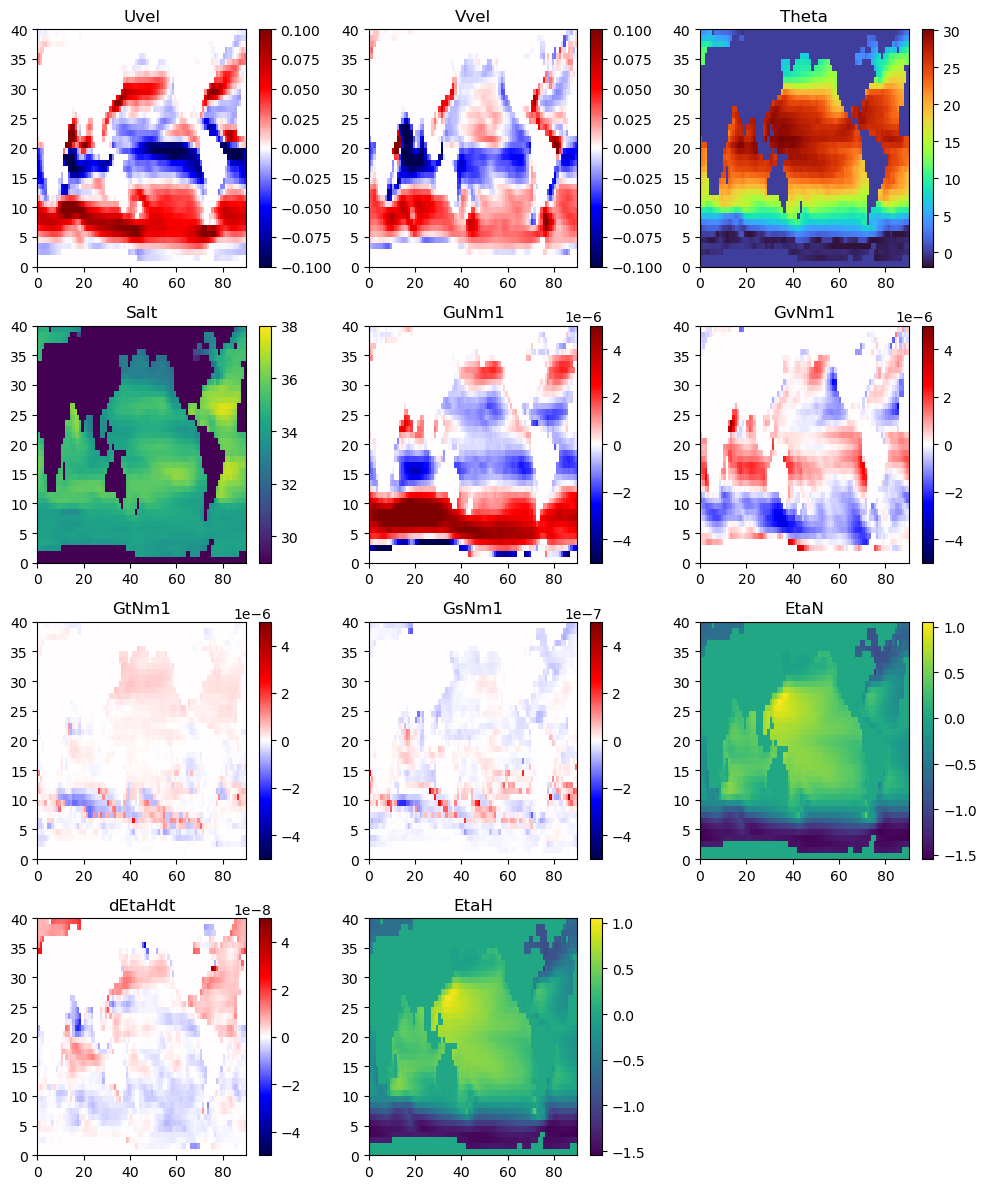

In [26]:
fig = plt.figure(figsize=(10,12))

plt.subplot(4,3,1)
C = plt.pcolormesh(uvel[0,:,:], cmap='seismic', vmin=-0.1, vmax=0.1)
plt.colorbar()
plt.title('Uvel')

plt.subplot(4,3,2)
C = plt.pcolormesh(vvel[0,:,:], cmap='seismic', vmin=-0.1, vmax=0.1)
plt.colorbar()
plt.title('Vvel')

plt.subplot(4,3,3)
C = plt.pcolormesh(theta[0,:,:], cmap='turbo')
plt.colorbar()
plt.title('Theta')

plt.subplot(4,3,4)
C = plt.pcolormesh(salt[0,:,:], cmap='viridis', vmin=29, vmax=38)
plt.colorbar()
plt.title('Salt')

plt.subplot(4,3,5)
C = plt.pcolormesh(GuNm1[0,:,:], cmap='seismic', vmin=-5e-6, vmax=5e-6)
plt.colorbar()
plt.title('GuNm1')

plt.subplot(4,3,6)
C = plt.pcolormesh(GvNm1[0,:,:], cmap='seismic', vmin=-5e-6, vmax=5e-6)
plt.colorbar()
plt.title('GvNm1')

plt.subplot(4,3,7)
C = plt.pcolormesh(GtNm1[0,:,:], cmap='seismic', vmin=-5e-6, vmax=5e-6)
plt.colorbar()
plt.title('GtNm1')

plt.subplot(4,3,8)
C = plt.pcolormesh(GsNm1[0,:,:], cmap='seismic', vmin=-5e-7, vmax=5e-7)
plt.colorbar()
plt.title('GsNm1')

plt.subplot(4,3,9)
C = plt.pcolormesh(EtaN, cmap='viridis')
plt.colorbar()
plt.title('EtaN')

plt.subplot(4,3,10)
C = plt.pcolormesh(dEtaHdt, cmap='seismic', vmin=-5e-8, vmax=5e-8)
plt.colorbar()
plt.title('dEtaHdt')

plt.subplot(4,3,11)
C = plt.pcolormesh(EtaH, cmap='viridis')
plt.colorbar()
plt.title('EtaH')

plt.tight_layout()
plt.show()